# Exercise 2.1

In this exercise we want to calculate the integral:
$$I=\int_0^1 \frac{\pi}{2}\cos(\frac{\pi x}{2})dx=1$$

1) by sampling a uniform distribution in $[0,1]$

2) by sampling a non-uniform distribution in $[0,1]$ using the *Importance Sampling* method.

In the first method we generate $M$ random uniform distributed variables $x_i$ in the interval $[0,1]$ and for each one we calculate:
$$f(x_i)=\frac{\pi}{2}\cos(\frac{\pi x}{2})$$
then we apply the *Data Blocking* method on the set $\{f(x_i)\}_{i=1}^{i=M}$

In the second one we use a non-uniform probability distribution
$$p(x)\propto (1-x)$$
and we normalize it in the interval $[0,1]$ :
$$p(x)={2(1-x)}$$
Then we substitute:
$$I=\int_0^1 \frac{f(x)}{p(x)}\cdot p(x) dx=\int_0^1 g(x)\cdot p(x) dx$$

We generate $M$ variables $x_i$ extracted from $p(x)$ and we calculate for each one $g(x_i)$.
Like we did before we apply the *Data Blocking* method on the set $\{g(x_i)\}_{i=1}^{i=M}$

We use $M=10^6$ and $N=100$ blocks.

Notice that to sample $p(x)$, we used the method of inversion of the cumulative.

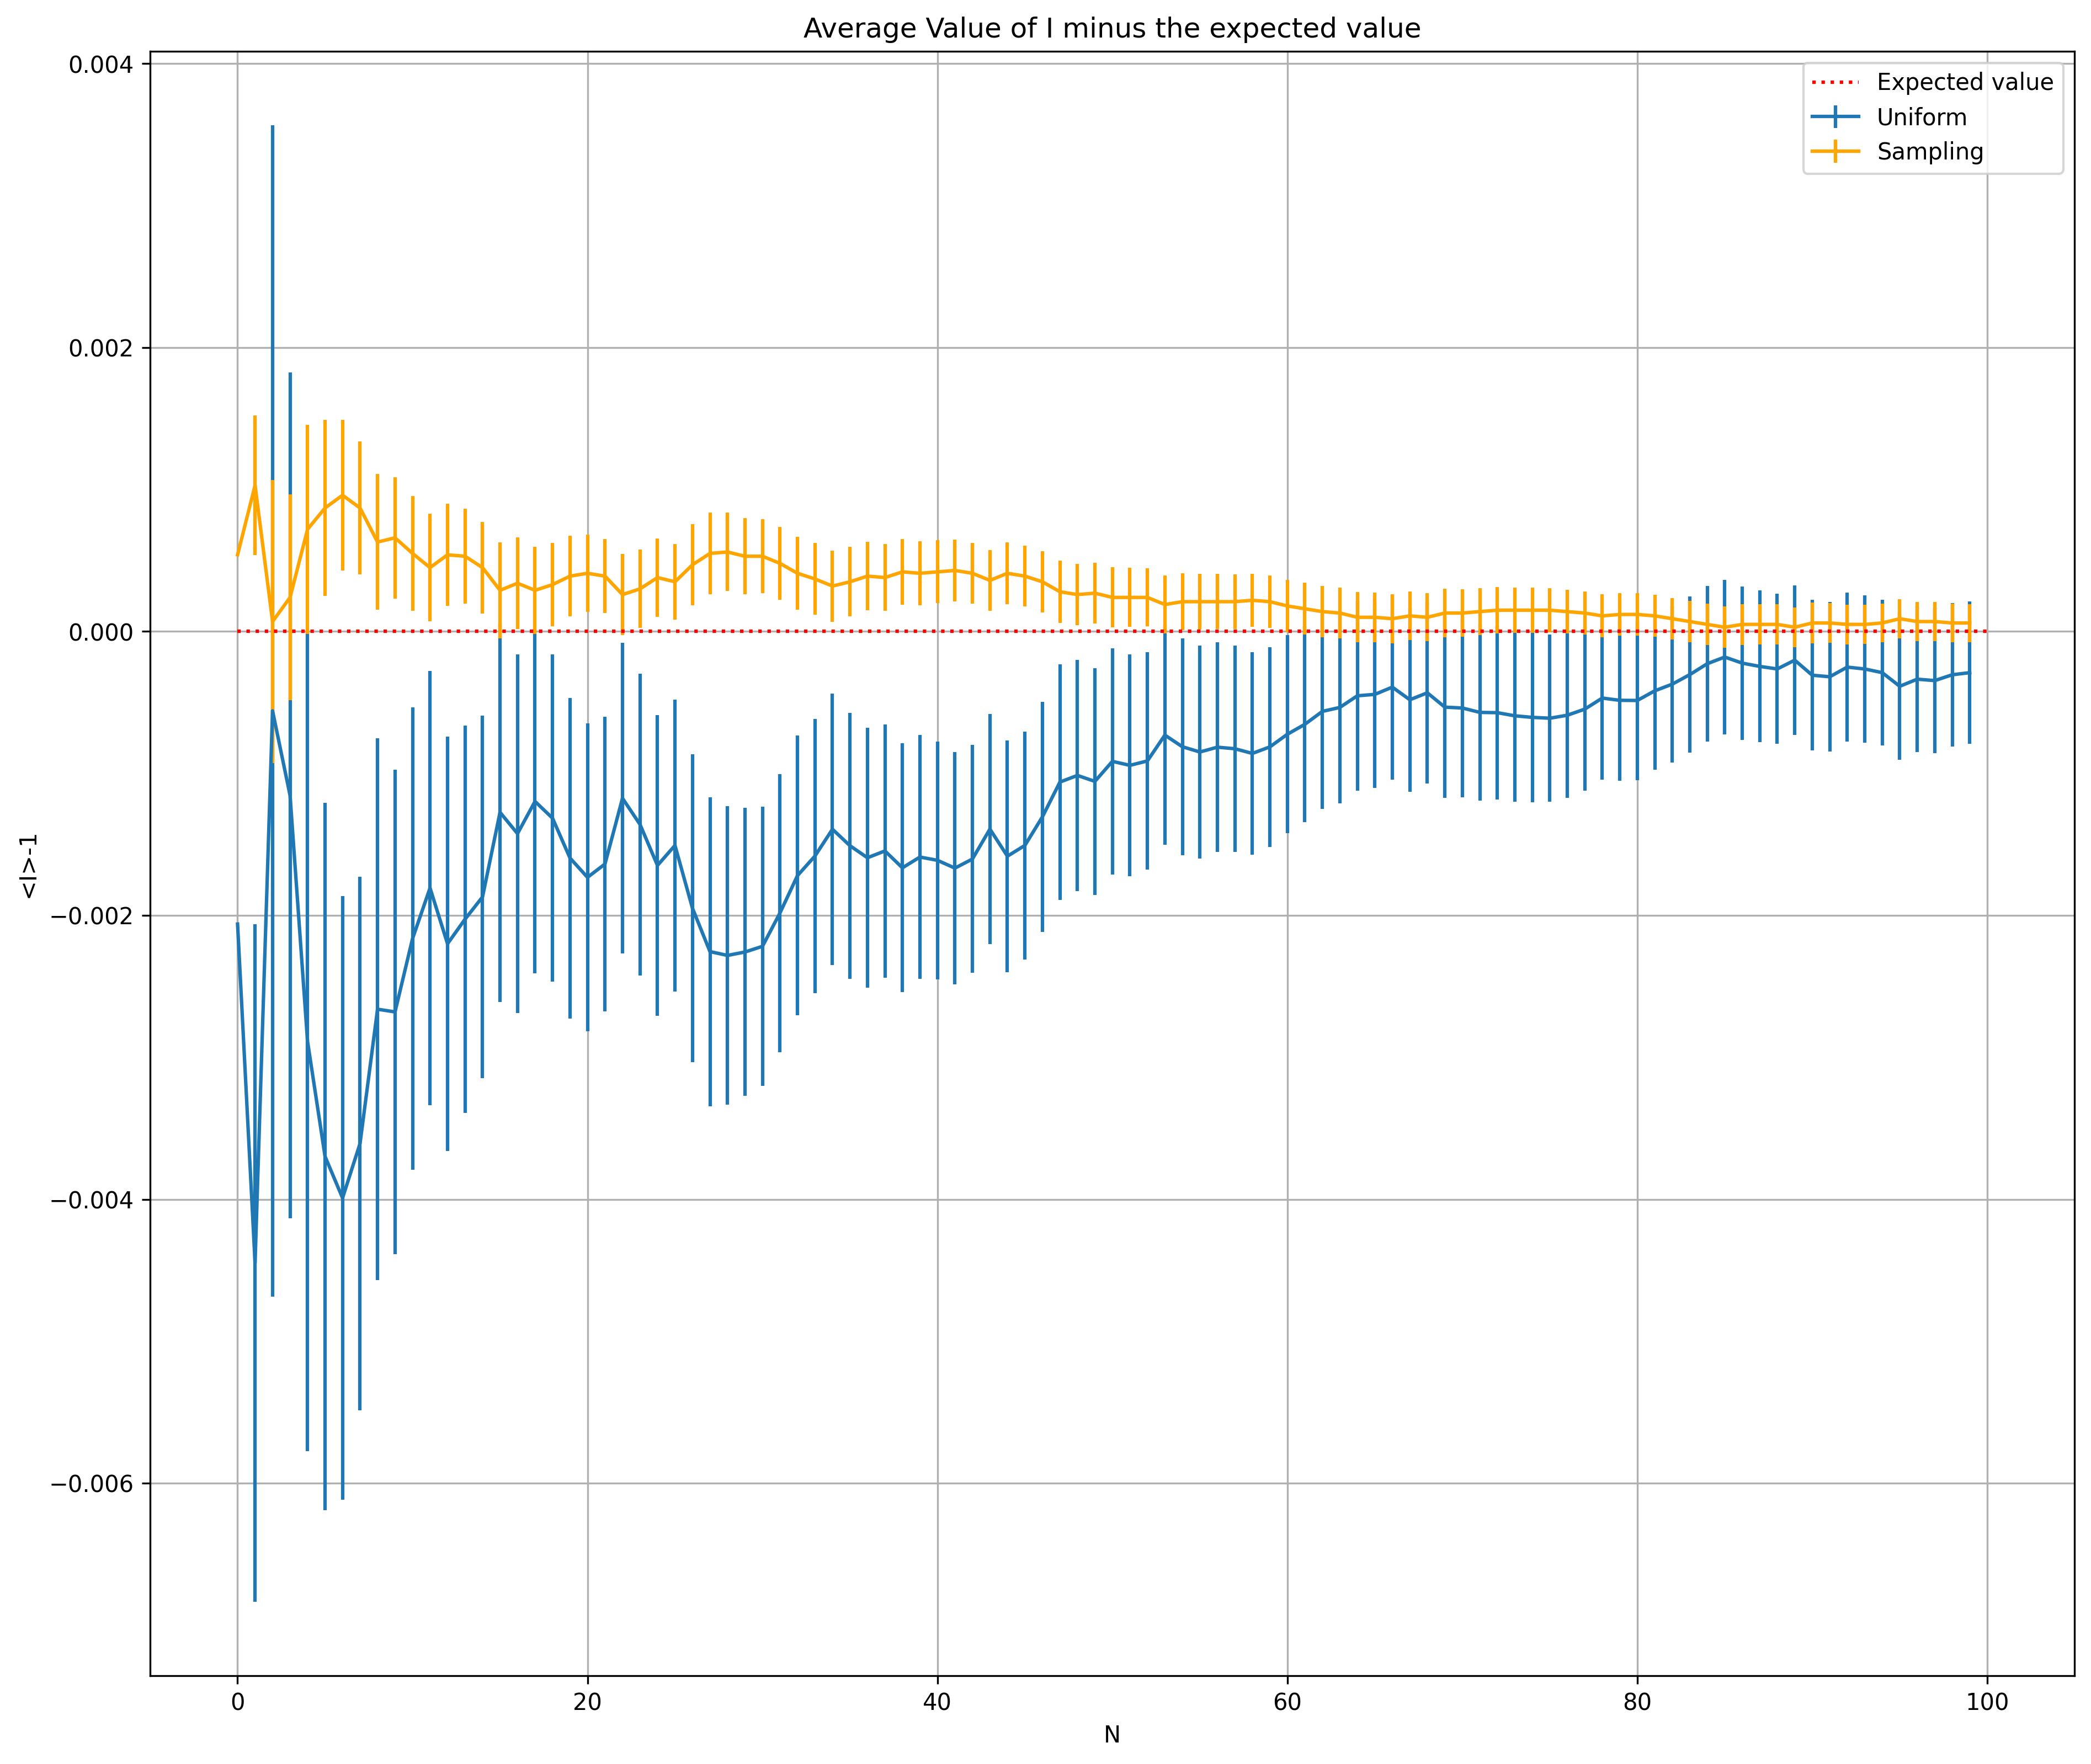

I average (Uniform distribution) for N=100:  0.99971  +-  0.000501266
I average (Importance Sampling) for N=100:  1.00006  +-  0.000134265


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


x, f, error = np.loadtxt("2.1/standard.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

X, F, Error = np.loadtxt("2.1/sampling.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(15,13),dpi=300)
plt.errorbar(x,f-1,yerr=error,label = "Uniform")
plt.errorbar(X,F-1,yerr=Error,label = "Sampling", color="orange")
plt.xlabel('N')
plt.ylabel('<I>-1')
plt.grid(True)

plt.hlines(0,0,100,colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
plt.legend()
plt.title("Average Value of I minus the expected value")

plt.show()
print("I average (Uniform distribution) for N=100: ",f[99]," +- ", error[99])
print("I average (Importance Sampling) for N=100: ",F[99]," +- ", Error[99])


With both methods the average value approaches the expected value for increasing N. 
The uncertainty obtained from the Importance Sampling method is $\approx \frac{1}{5}$ of the uncertainty calculated with the Uniform Distribution method. 

# Exercise 2.2

In this exercise we want to simulate two random walks:

 - on a **Cubic lattice** with lattice constant $a=1$;
 - in the **Continuum** with a step lenght of $a=1$.
 

For the first one, at each step there is an equal probability, $p=\frac{1}{6}$, of moving from the present point to one of its $6$ nearest neighbours.

For the second one, at each step there is an equal probability of moving in any direction.
To achieve this, we generate the polar angle $\theta$ and the azimuthal angle $\phi$.

- $\phi$ is generated from a uniform distribution in $[0,2\pi]$;

- $\theta\in[0,\pi]$ is given by:
$$\theta=\cos^{-1}(1-2s)$$
where s is  uniformly distributed in $[0,1)$.

In both of them, we calculated the distance squared from the origin as a funtion of the number of steps $i$. 
The distance squared is given by:
$$\vec{r}^2_i=a\cdot(x^2_i+y^2_i+z^2_i)$$ 
where $i$ goes from $0$ to $100$ and $\vec{r}_0=(0,0,0)$.


We applied the *Data Blocking* method for each step $i$ with $N=100$ number of blocks and $L=10000$ number of simulations.

To obtain the value of $s_i=\sqrt{\langle |\vec{r}_i|^2 \rangle}$ we take the square root of the last value of the i-th progressive sum $t_i$.

To obtain the uncertainty we used the propagation of errors:
$$\sigma_{s_i}=\frac{\sigma_{t_i}}{2\sqrt{t_i}}$$

where $\sigma_{t_i}$ is the uncertainty of $t_i$

##  <font color="blue">  Plots of $\sqrt{\langle |\vec{r}_i|^2 \rangle}$ and their uncertainty as a function of the number of steps $i$

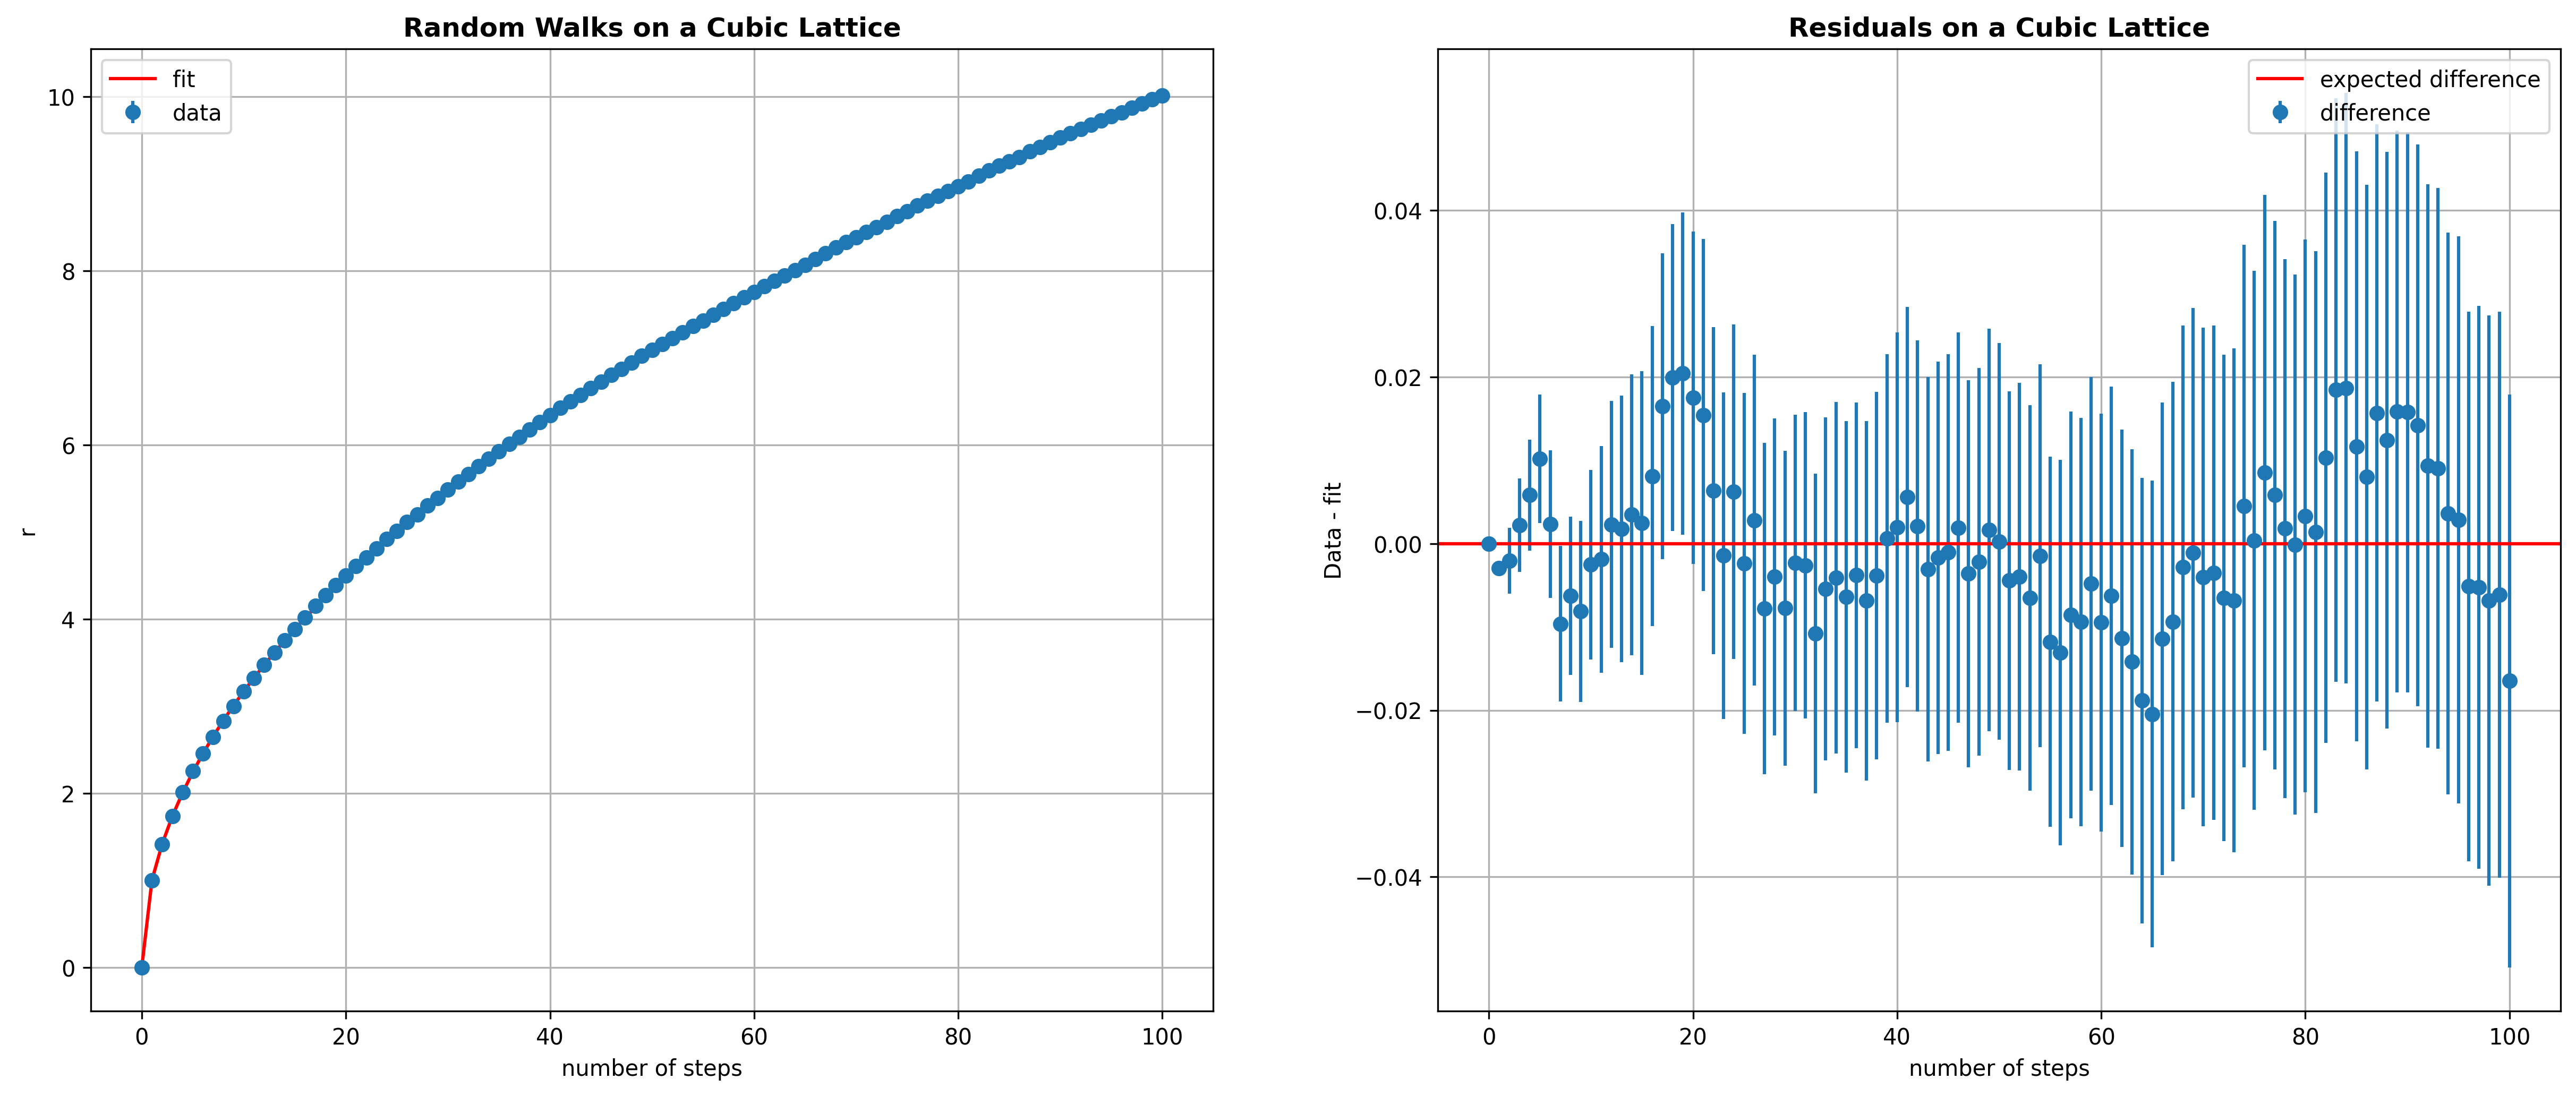

k = 1.002947113318593 +- 0.00012338345018498572
-------------------------------------------------------------------------


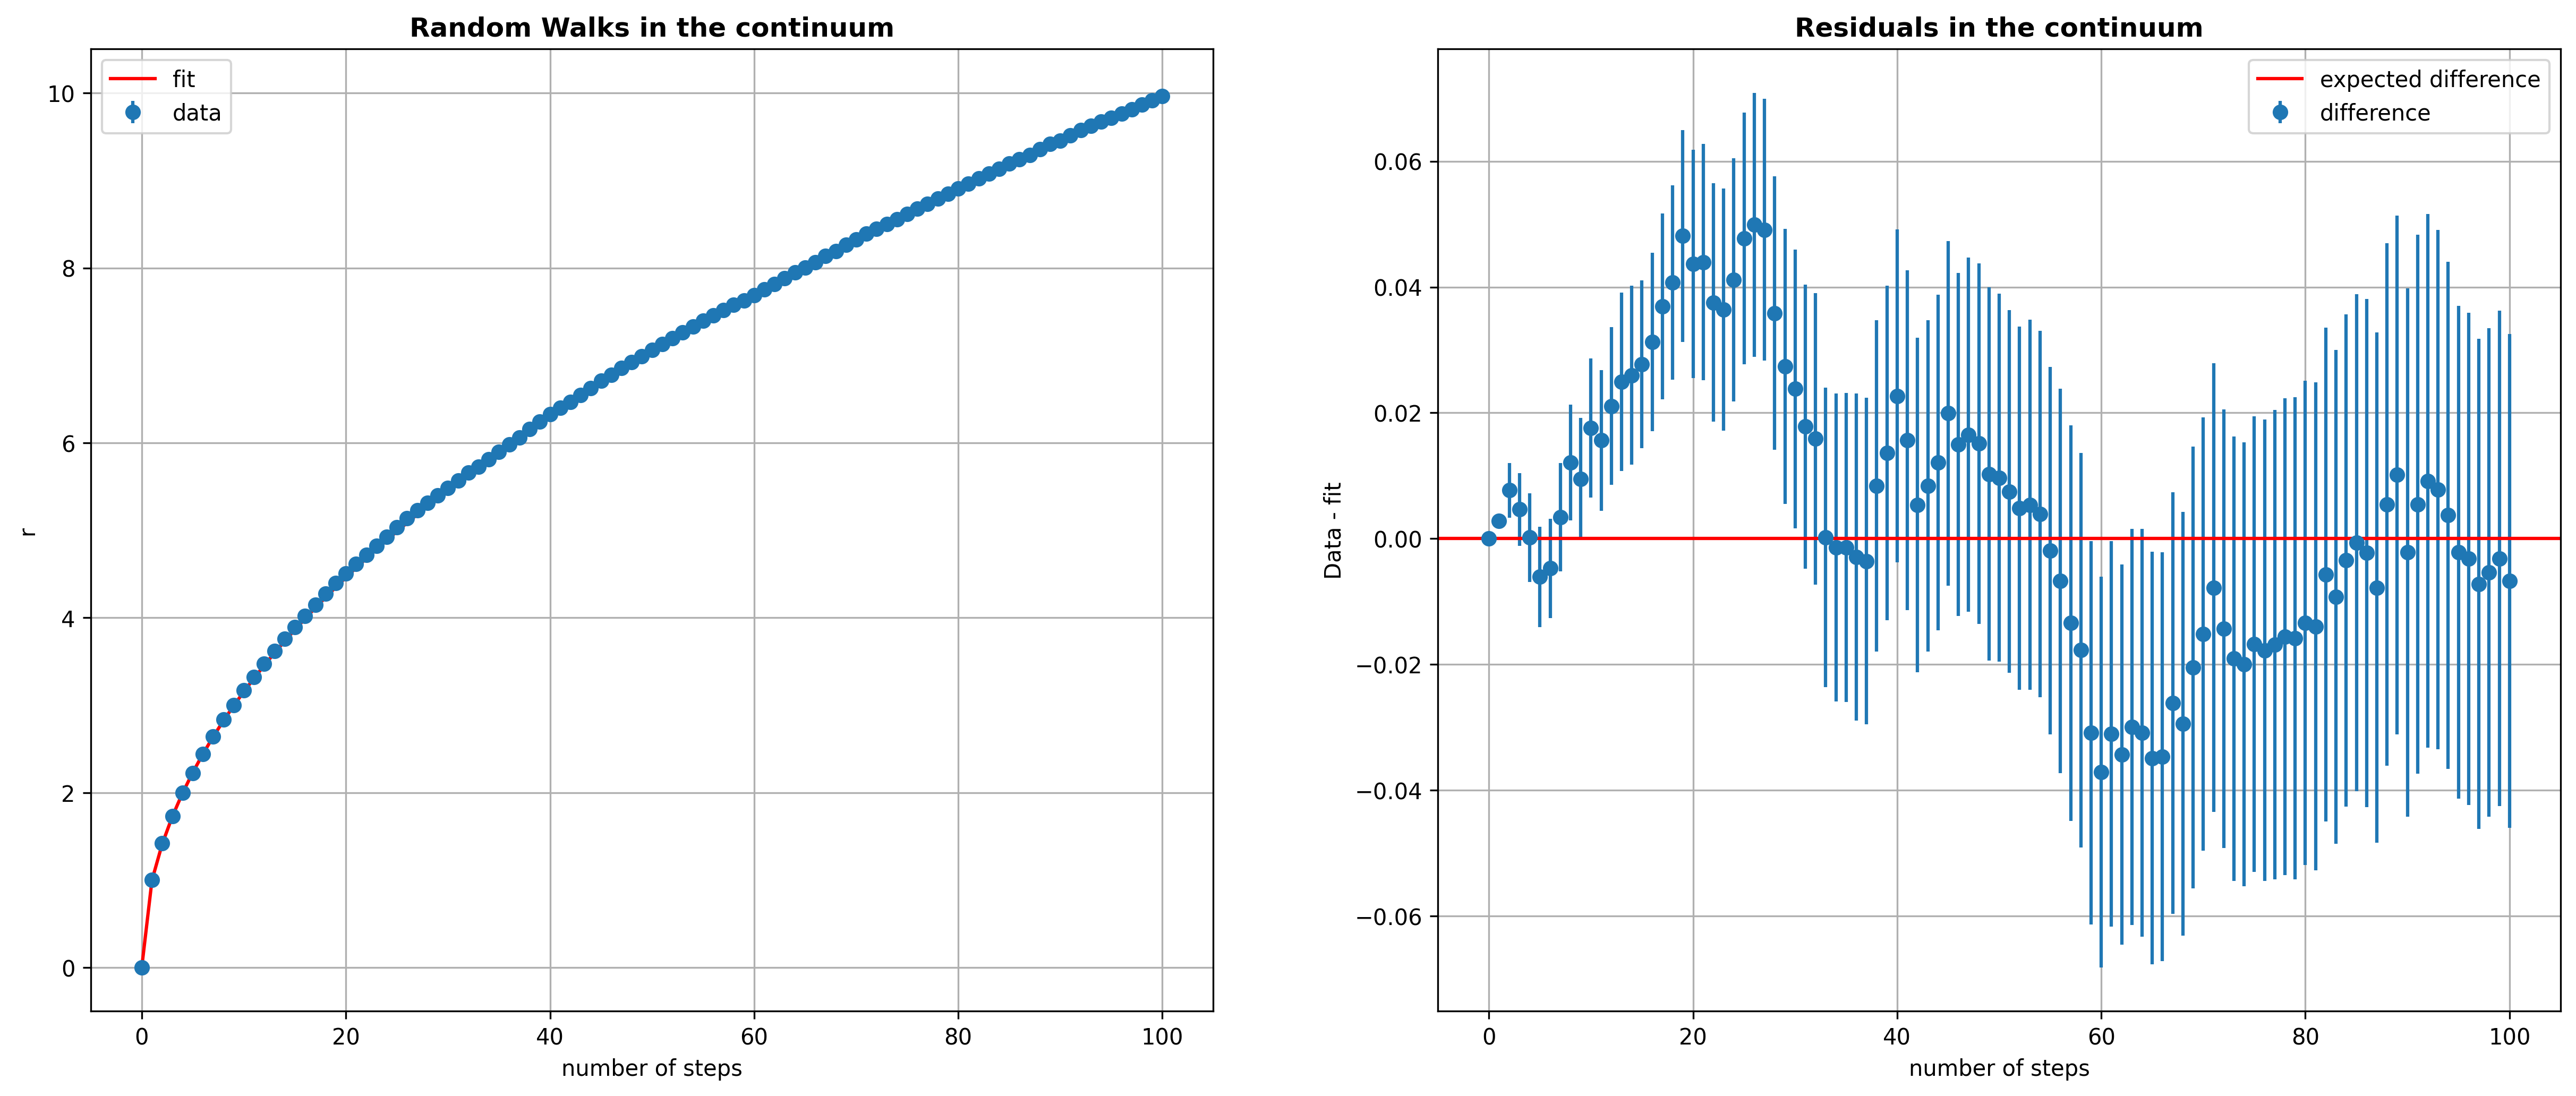

k = 0.9972190328195197 +- 0.00030202653597520226
-------------------------------------------------------------------------


In [2]:
from scipy.optimize import curve_fit
def f(x,k):  # defining the fitting function
    return (k * np.sqrt(x))

file=["discrete","continue"]
for i in file:
    X, Y, error = np.loadtxt("2.2/"+i+".dat", usecols=(0,1,2), delimiter=' ', unpack='true')

    fig=plt.figure(figsize=(20,8),dpi=300)
    plt.subplot(1,2,1)
    plt.errorbar(X,(Y),yerr=error,label = "data",fmt="o")
    plt.xlabel('number of steps')
    plt.ylabel('r')
    plt.grid(True)

    k=1.0
    popt,pcov= curve_fit(f,X,Y)
    perr= np.sqrt(np.diag(pcov))
    plt.plot(X,f(X,*popt), color="red",label="fit")

    if i=="discrete":
        plt.title('Random Walks on a Cubic Lattice',weight="bold")
    else:
        plt.title('Random Walks in the continuum',weight="bold")
    plt.grid(True)
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.errorbar(X,Y-f(X,*popt),yerr=error,label = "difference",fmt="o")
    plt.axhline(y=0.0, color='r', linestyle='-',label="expected difference")
    plt.xlabel('number of steps')
    plt.ylabel('Data - fit')
    if i=="discrete":
        plt.title('Residuals on a Cubic Lattice',weight="bold")
    else:
        plt.title('Residuals in the continuum',weight="bold")
    plt.grid(True)
    plt.legend()
    plt.show()

    print("k =",popt[0],"+-",perr[0])
    print('-------------------------------------------------------------------------')

Both of the data have been fitted with $f(N)=k\cdot\sqrt{N}$, where $N$ is the number of steps.
For almost all steps, the measures are within two standard deviations from the respective fitted values, we deduce that our random walks have a diffusive behaviour.